# Neural network surrogate model of Flow123d implementation of Tunnel Sealing Experiment (TSX) benchmark

- NN is implemented using PyTorch, structure can be seen in `flow_torch_wrapper.py`
- Weights and biases are stored in `model_TSX_large.pth` and `model_TSX_small.pth` files (two sizes of NN)
- wrapper of NN is available as `from flow_torch_wrapper import Wrapper`
- `Wrapper` class has `.set_parameters` method to supply parameters in which to compute (can be a series of `N` parameters in the form of `Nx8` matrix)
  - paremeters are in their natural value, i.e. exponentiated (e.g. [2.7e-08 3.5e+11 3.6e+07 1.9e+06, 4.1e-22 5.6e-19 1.3e-06 2.6e-08])  
- computed values are returned as a series of `N` series of 104 (26*4) values of measurements in form of `Nx104` matrix using the method `.get_observations`
- `Wrapper` can be initialized with `Wrapper('model_TSX_large.pth')` or `Wrapper('model_TSX_small.pth')` to load the appropriate model and with optional `device` parameter to specify device (default is `cpu`)

In [6]:
import numpy as np
from flow_torch_wrapper import Wrapper
wrapper = Wrapper("model_TSX_large.pth", device="cpu")

/home/ber0061/Repositories/TSX_NN/TSX_pytorch/flow_torch_wrapper.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nn_data = torch.load(file_path, map_location=torch.devi

## Some sample data for testing

In [7]:
# test parameters (close to best fit for all measurements)
data_in = np.array([[7.53174366e-08, 1.19254157e+11, 5.49356370e+07, 6.42856150e+05,
                     4.67731127e-22, 3.96191331e-19, 2.25739479e-07, 2.24643573e-09]])

# measurements from Rutqvist
obs = [274.493, 598.089, 754.648, 788.376, 755.019, 708.272, 655.96,
       614.478, 594.397, 567.178, 530.437, 523.486, 519.986, 488.658,
       473.097, 449.254, 427.516, 375.872, 350.198, 326.953, 308.361,
       300.999, 304.645, 284.828, 293.824, 297.788, 291.485, 427.364,
       515.434, 567.879, 587.819, 596.3, 600.231, 604.243, 604.489,
       604.594, 600.397, 599.094, 600.103, 601.055, 599.368, 599.58,
       600.99, 581.231, 571.386, 554.697, 551.751, 549.683, 547.89,
       545.508, 541.846, 539.883, 262.01, 62.843, 48.083, 42.681,
       42.939, 45.082, 49.942, 56.008, 61.353, 60.29, 59.664,
       60.607, 79.2, 81.487, 91.98, 90.062, 89.222, 79.33,
       79.328, 82.684, 77.313, 78.002, 85.332, 75.852, 82.56,
       89.099, 257.901, 191.829, 182.317, 190.039, 199.557, 206.607,
       212.157, 219.182, 224.155, 227.275, 229.71, 231.45, 241.012,
       255.277, 263.437, 269.275, 277.377, 279.185, 280.966, 280.606,
       284.337, 287.483, 291.912, 293.878, 296.581, 295.564]
# time points for measurements
times = [0., 10., 17., 27., 37., 47., 57., 67., 77., 87., 97.,
         100., 120., 140., 160., 180., 200., 220., 240., 260., 280., 300.,
         320., 340., 360., 365.]

## Plot "best fit" vs "true" data from Rutqvist

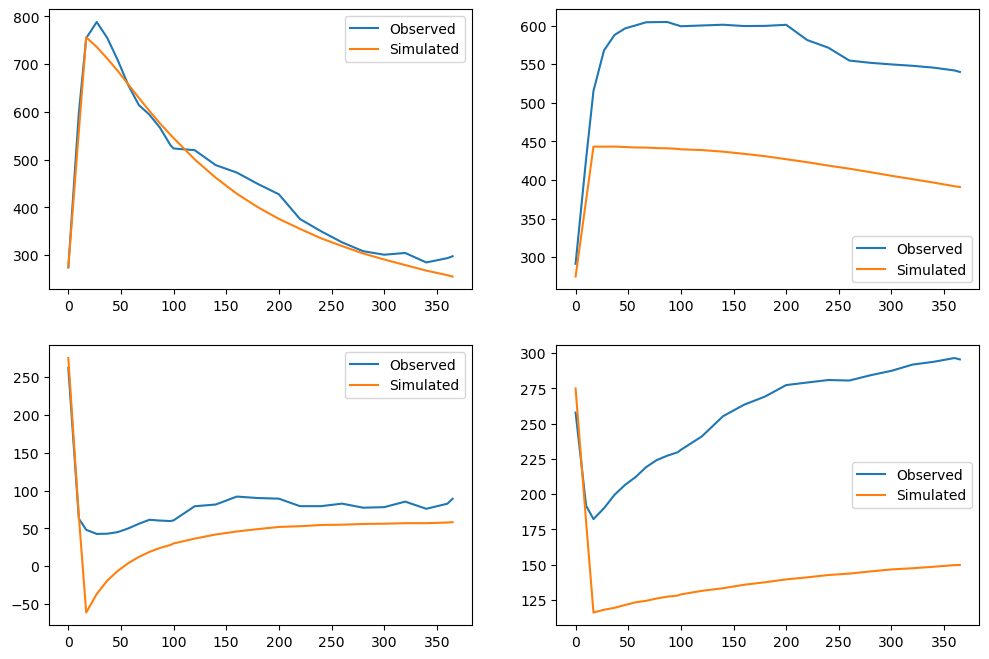

In [8]:
import matplotlib.pyplot as plt

wrapper.set_parameters(data_in)
data_out = wrapper.get_observations()

# Plot data into 4 sublots in 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(4):
    ax = axs[i // 2, i % 2]
    ax.plot(times, obs[i*26:(i+1)*26], label="Observed")
    ax.plot(times, data_out.T[i*26:(i+1)*26], label="Simulated")
    ax.legend()

# Evaluating the surrogate at samples and best fits for each measurement

## Generating samples from lognormal distribution from prior

In [9]:
means = np.array([-16, 26, 17, 16, -48, -41, -14, -16], dtype=np.float32)[None, :]
std = np.array([2, 2, 2, 2, 2, 2, 2, 2], dtype=np.float32)[None, :]

# Generate 100000 samples from normal distribution
samples = np.random.normal(size=(100000, 8))
samples = samples * std + means
samples = np.exp(samples)

# Simulate the model for each sample
wrapper.set_parameters(samples)
data_out = wrapper.get_observations()

## Plotting 5 test cases: first only one of 4 measurement, then all 4 measurements together

Best parameters: [3.43105615e-07 3.35726371e+10 7.15570858e+07 1.97440497e+06
 1.68651175e-21 2.35432649e-20 9.77278652e-07 5.65187268e-09]


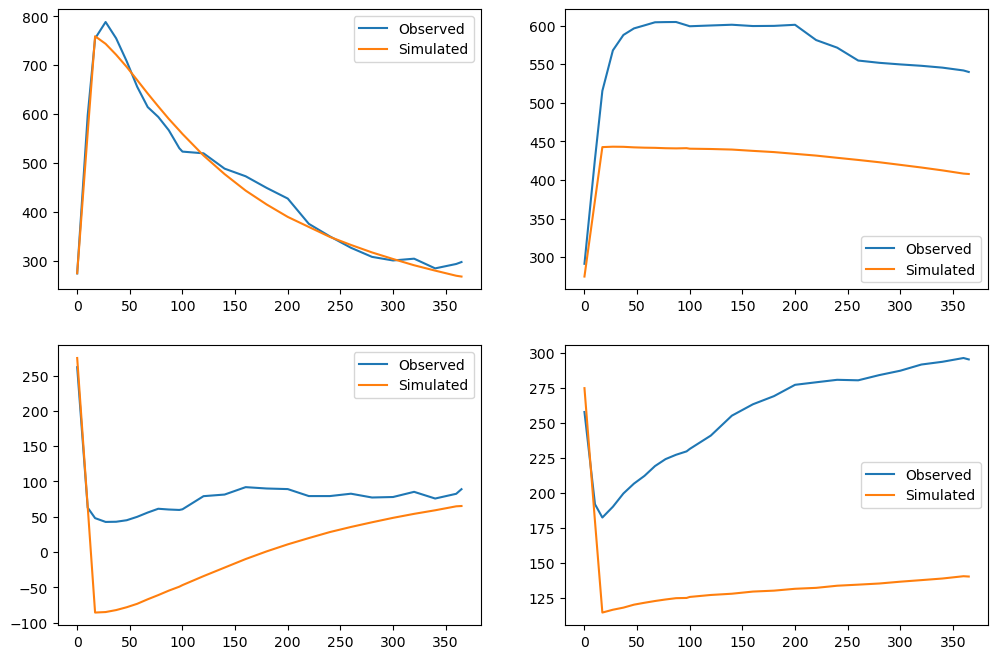

Best parameters: [4.70230961e-08 2.99878078e+10 2.38272187e+07 2.55786093e+06
 3.59612674e-22 8.28624845e-19 8.59893723e-07 3.31557451e-08]


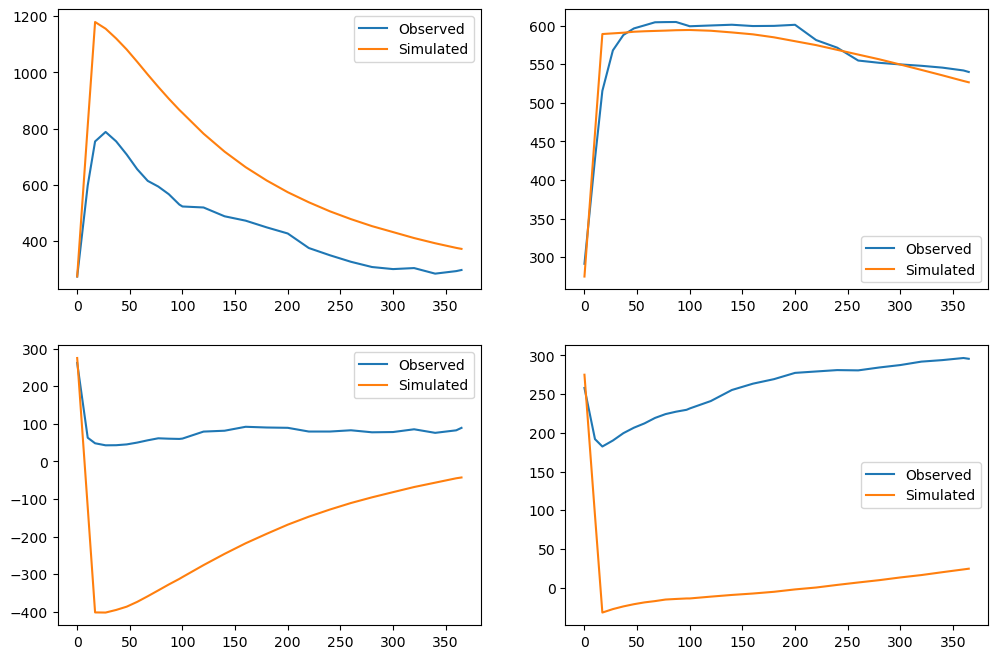

Best parameters: [2.33936298e-07 8.72080326e+09 5.39211317e+07 3.57080250e+07
 7.45860448e-21 1.87533145e-19 4.29680429e-07 5.70235676e-06]


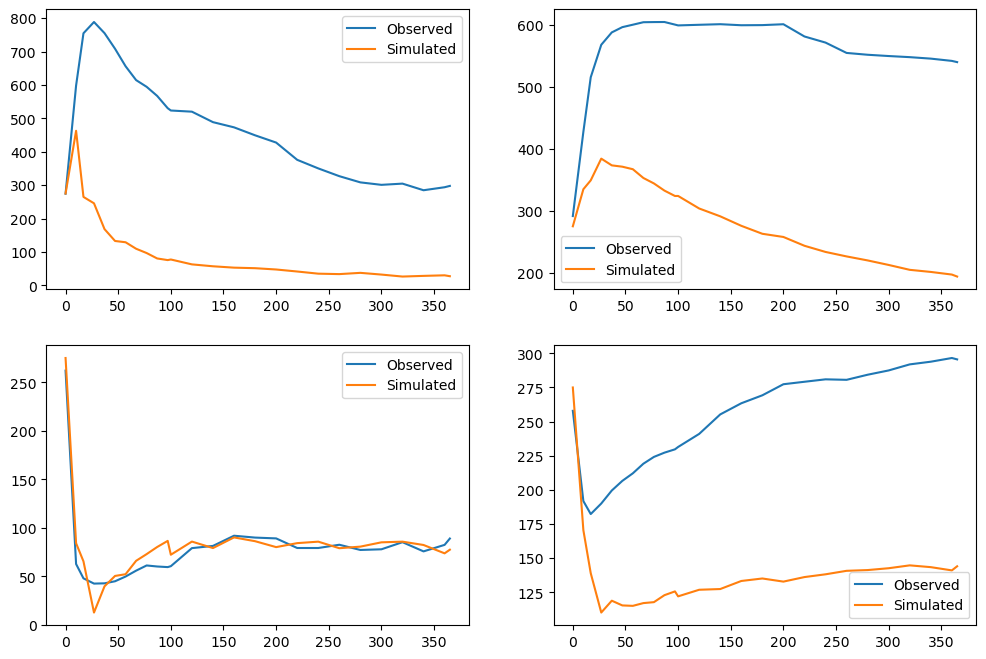

Best parameters: [1.00614369e-07 7.97907288e+09 5.36929408e+07 4.39027367e+07
 4.11662316e-22 6.09462076e-18 1.70395509e-07 1.01987902e-07]


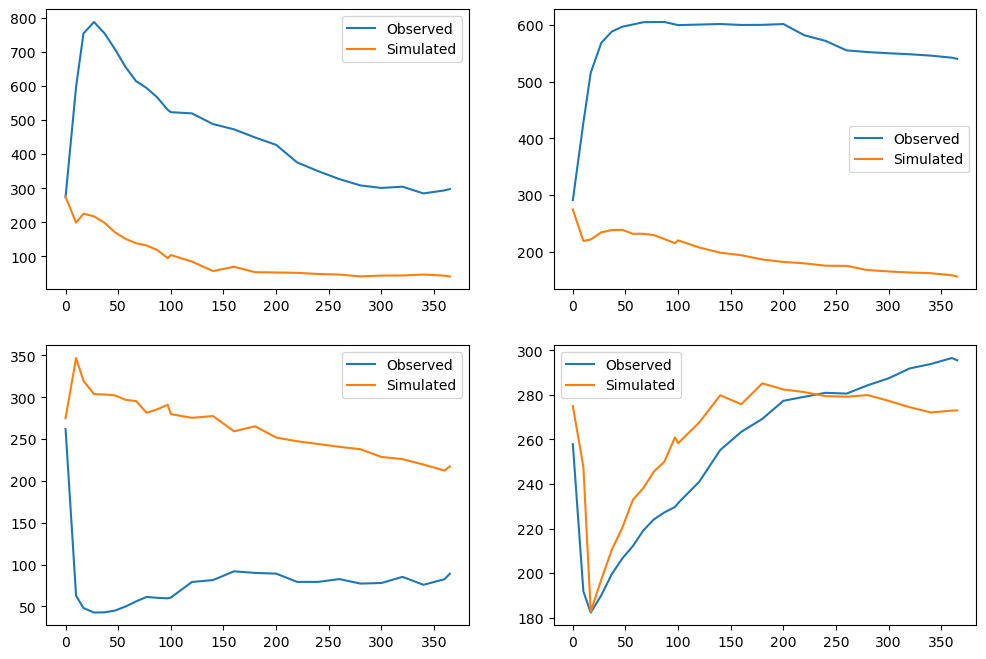

Best parameters: [9.84642169e-07 6.10278795e+10 3.97028338e+08 2.18142878e+07
 2.01014882e-22 1.11445445e-19 2.50049703e-08 4.05190559e-09]


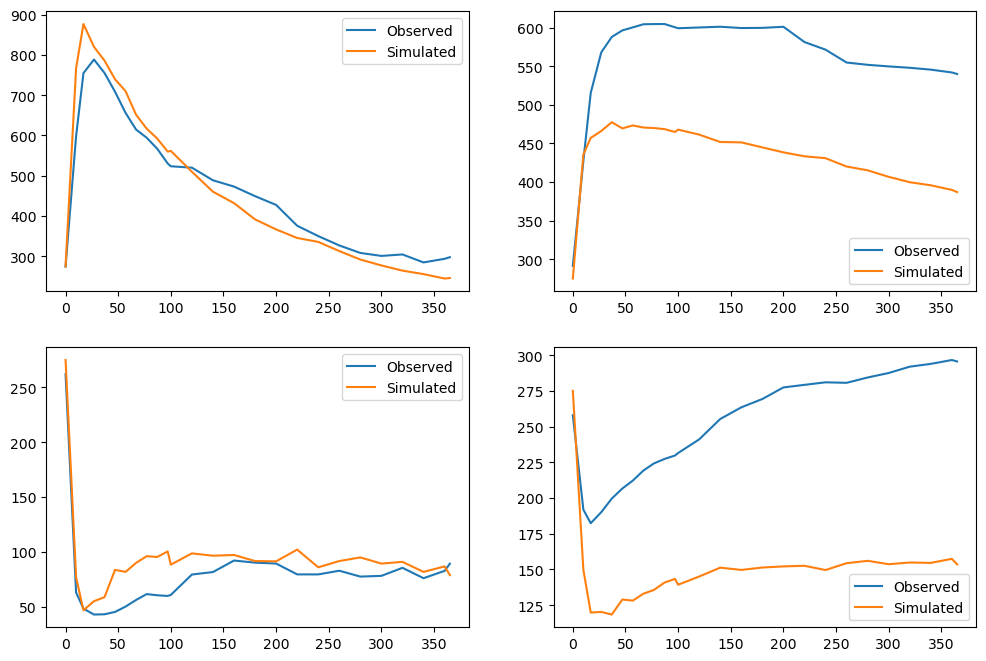

In [10]:

for part in range(5):
    if part == 4:
        slice_it = slice(part * 26)
    else:
        slice_it = slice(part * 26, (part + 1) * 26)
    norms = np.linalg.norm(data_out[:, slice_it] - obs[slice_it], axis=1)
    idx = np.argmin(norms)
    print(f"Best parameters: {samples[idx]}")
    # Plot data into 4 sublots in 2x2 grid
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    for i in range(4):
        ax = axs[i // 2, i % 2]
        ax.plot(times, obs[i * 26:(i + 1) * 26], label="Observed")
        ax.plot(times, data_out[idx, i * 26:(i + 1) * 26], label="Simulated")
        ax.legend()
    plt.show()